In [1]:
from  SyntheticMicro import *
import numpy as np
from numpy import ndarray as Tensor
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mu : float = 1.0
interspec : float= 0.6
nodes_number : int= 28
interaction_probability :float = 1

#np.random.seed(12)

# Step 1

A_matrix : Tensor = ER_Eco_Net_Matrix(nodes_number, interaction_probability, interspec )


# Step 2

# This matrix will be "broadcasted" to all Ax columns
r_matrix : Tensor = np.random.uniform(0,1, nodes_number)

#Step 3


In [3]:

def SystemDynamics(  time , input_values ):
    """
    dx/dt = diag(x)[Ax+r]
    """
    A_m = A_matrix
    r_m = r_matrix
    diag_m = Diagonal_Matrix( np.array(input_values))

    left_product = np.matmul(A_m, np.array(input_values) ) + r_m

    dx =  np.matmul(diag_m,left_product.T).flatten()

    return dx.tolist()[0]


In [49]:


T : int = 600

sol_flag : int = 0
    
while sol_flag == 0:
    initial_cond = Get_Random_Composition(nodes_number )
    solution1 = solve_ivp(SystemDynamics, (0,T), initial_cond, rtol = 1e-6, method='RK45'    )
    
    if solution1.status != -1:
        sol_flag = 1



In [50]:
print(solution1.message)

The solver successfully reached the end of the integration interval.


2642


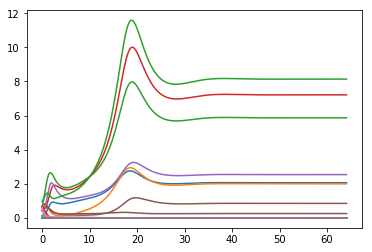

In [56]:
n_spec = solution1.y.shape[0]

print(len(solution1.t))

lim : int = round(len(solution1.t)*0.1)
for k in range(n_spec):

    plt.plot(solution1.t[0:lim], solution1.y[k,0:lim])

In [54]:
solution1.y[:,500]

array([2.06232260e+000, 1.99943669e+000, 5.86999953e+000, 7.21665377e+000,
       0.00000000e+000, 2.56907289e-001, 0.00000000e+000, 1.25373995e-074,
       0.00000000e+000, 3.53334319e-180, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 2.54061757e+000, 8.51085104e-001,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1.93665175e-204, 8.14008175e+000, 4.18407011e-006,
       0.00000000e+000, 0.00000000e+000, 1.58763610e-077, 0.00000000e+000])